# Importing libraries and appending paths 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sys
import plotly.graph_objects as go

In [2]:
sys.path.append('..')

# Importing serotype data

In [3]:
file_s = '../Data/dengue_BR_serotypes.csv'
s_data = pd.read_csv(file_s, delimiter = ';')

In [4]:
s_data_grouped = s_data.groupby(['YEAR','SOROTIPO','SG_UF_NOT'])['NUMBER'].sum()
s_data_grouped = s_data_grouped.to_frame(name = 'CASES').reset_index()

In [5]:
s_data = s_data_grouped.copy()

## Pre-processing and padding
- Basically padding for all 0 values that are in this dataframe, so that we have information for all states for all serotypes and for all years

In [6]:
years = s_data['YEAR'].unique()
states = s_data['SG_UF_NOT'].unique()
serotypes = s_data['SOROTIPO'].unique()

In [7]:
s_data

YEAR SOROTIPO SG_UF_NOT  CASES
0     2007                 AC    507
1     2007                 AL   9343
2     2007                 AM   1497
3     2007                 AP   3460
4     2007                 BA   5975
...    ...      ...       ...    ...
1422  2021        3        BA      2
1423  2021        3        PE      1
1424  2021        4        GO      5
1425  2021        4        MT      1
1426  2021        4        PA      1

[1427 rows x 4 columns]

In [8]:
years_df = []
states_df = []
serotypes_df = []
cases_df = []

In [9]:
for year in years:
    for state in states:
        for serotype in serotypes:
            years_df.append(year)
            states_df.append(state)
            serotypes_df.append(serotype)
            filt_tmp = ((s_data['SG_UF_NOT'] == state) & (s_data['YEAR'] == year) & (s_data['SOROTIPO'] == serotype))
            s_tmp = s_data[filt_tmp]
            if(s_tmp.empty):
                cases_df.append(0)
            else:
                cases_df.append(s_tmp.iloc[0]['CASES'])

In [10]:
df_total = pd.DataFrame(list(zip(years_df, states_df, serotypes_df, cases_df)),
                   columns =['YEAR', 'STATE', 'SEROTYPE', 'CASES'])

# Interactive Result Plots

## Number of serotype tests per state

That is, number of positive cases that were tested for serotype 1,2,3 or 4.

In [11]:
# total tests per state per year
df_res = df_total.copy()
filt_res = (df_res['SEROTYPE'] != ' ')
df_res = df_res[filt_res]
df_res = df_res.groupby(['YEAR','STATE'])['CASES'].sum()
df_res = df_res.to_frame(name = 'TESTS').reset_index()
df_tmp = df_total.copy()
df_tmp = df_tmp.groupby(['YEAR','STATE'])['CASES'].sum()
df_tmp = df_tmp.to_frame(name = 'CASES').reset_index()
df_res['CASES'] = df_tmp['CASES']
df_res['RATIO'] = df_res['TESTS']/df_res['CASES']

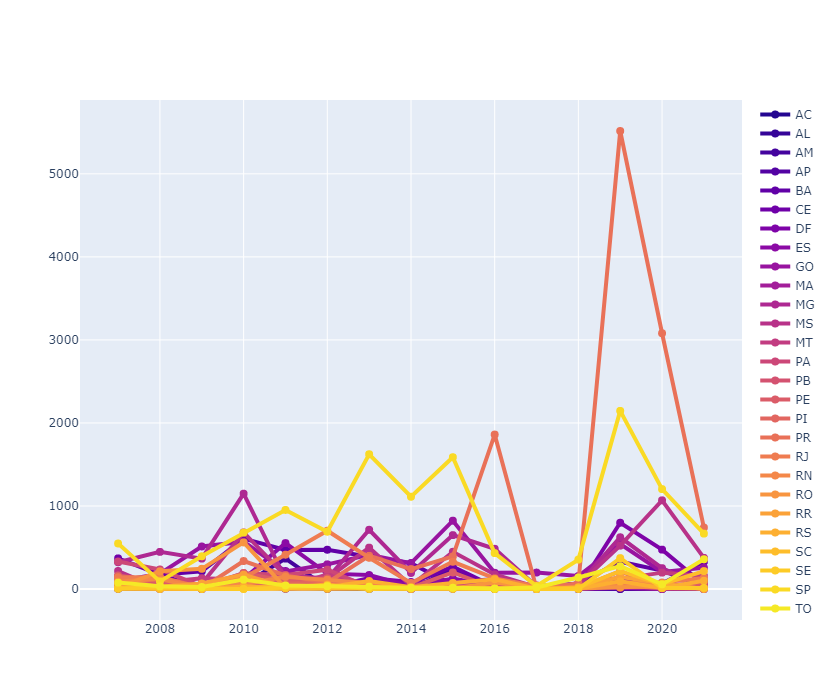

In [12]:
#extract color palette, the palette can be changed
pal = list(sns.color_palette(palette='plasma', n_colors=len(states)).as_hex())

fig = go.Figure()
for d,p in zip(states, pal):
    fig.add_trace(go.Scatter(x = df_res[df_res['STATE']==d]['YEAR'],
                             y = df_res[df_res['STATE']==d]['TESTS'],
                             name = d,
                             line_color = p, 
                             line_width = 4,
                             marker_size = 8,
                             fill=None))   #tozeroy 
    fig.update_layout(width = 900, height = 700)

fig.show()

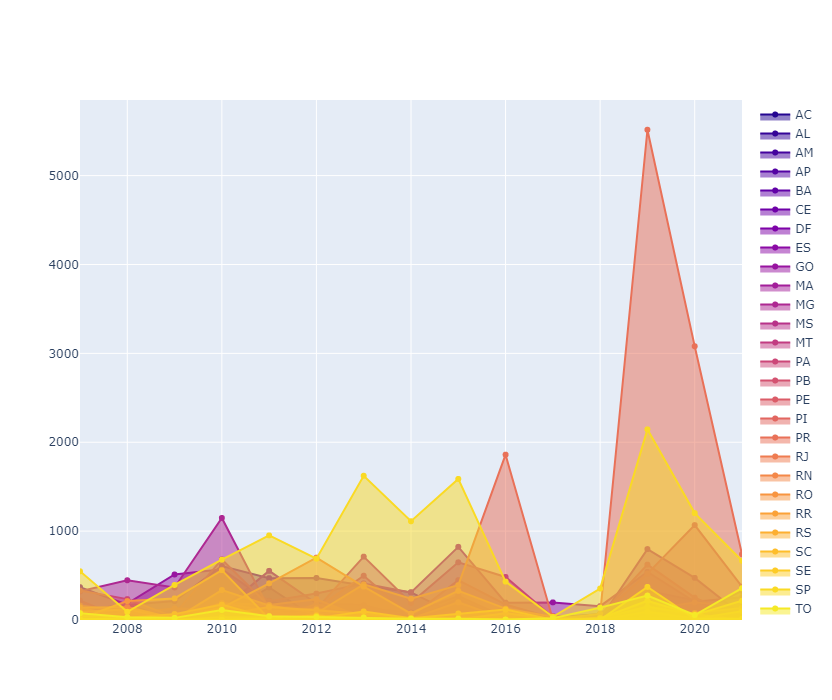

In [13]:
fig = go.Figure()
for d,p in zip(states, pal):
    fig.add_trace(go.Scatter(x = df_res[df_res['STATE']==d]['YEAR'],
                             y = df_res[df_res['STATE']==d]['TESTS'],
                             name = d,
                             line_color = p, 
                             fill='tozeroy'))   #tozeroy 
    fig.update_layout(width = 900, height = 700)

fig.show()

### Average and Standard Deviation of tests, maximum and minimum

In [14]:
df_res_tests = df_res.copy()
df_res_tests = df_res_tests.drop(columns = ['CASES','RATIO'])
df_res_tests = df_res_tests.pivot(index='YEAR', columns='STATE').droplevel(0, axis=1)

In [15]:
df_stats_tests = pd.DataFrame()
df_stats_tests['MEAN'] = df_res_tests.mean(axis = 0)
df_stats_tests['STD'] = df_res_tests.std(axis = 0)
df_stats_tests['STD/MEAN'] = df_res_tests.std(axis = 0)/df_res_tests.mean(axis = 0)
df_stats_tests['MAX'] = df_res_tests.max(axis = 0)
df_stats_tests['MIN'] = df_res_tests.min(axis = 0)

In [22]:
df_stats_tests.sort_values(['STD/MEAN'],ascending = [True])

MEAN          STD  STD/MEAN   MAX  MIN
STATE                                              
GO     330.933333   200.842321  0.606897   823   93
MT      92.533333    64.471330  0.696736   197    2
SP     834.200000   601.336749  0.720854  2145   36
PB      36.533333    29.693353  0.812774    97    0
BA     229.533333   191.865975  0.835896   607   25
MG     369.733333   315.228141  0.852582  1148   23
PE      73.866667    69.522727  0.941192   199    9
CE     125.533333   118.395141  0.943137   369    7
RN      48.533333    47.771580  0.984305   147    2
MA      20.466667    20.307869  0.992241    72    1
MS     296.600000   301.724046  1.017276  1068    2
RJ     185.933333   190.111045  1.022469   702    6
PA     100.066667   103.302238  1.032334   331   11
RS      40.400000    42.399124  1.049483   118    0
PI      52.333333    60.470378  1.155485   216    5
AL      18.133333    21.091185  1.163117    66    0
RR      42.933333    53.058548  1.235836   173    0
TO      82.066667   103.526716  1.261495   358    5
ES     100.333333   139.895199  1.394304   553    0
AM      59.200000    90.169048  1.523126   366    2
DF     126.200000   219.687505  1.740788   798    3
AC      17.000000    29.828079  1.754593    97    0
PR     869.200000  1538.323587  1.769815  5516    6
RO      83.866667   151.883822  1.811015   561    2
SC      35.466667    74.746110  2.107503   216    0
AP      21.933333    60.401593  2.753872   238    0
SE      34.066667    94.162828  2.764075   372    0

## Percentage of tests for serotype
That is, percentage of positive cases that were tested for serotype 1,2,3 or 4. That is, **cases tested/total cases**.

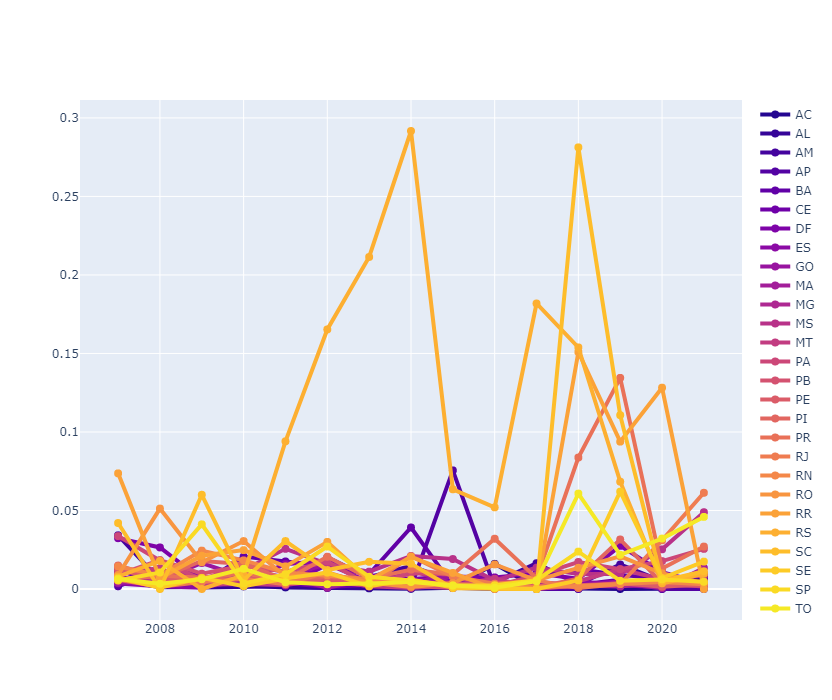

In [17]:
#extract color palette, the palette can be changed
pal = list(sns.color_palette(palette='plasma', n_colors=len(states)).as_hex())

fig = go.Figure()
for d,p in zip(states, pal):
    fig.add_trace(go.Scatter(x = df_res[df_res['STATE']==d]['YEAR'],
                             y = df_res[df_res['STATE']==d]['RATIO'],
                             name = d,
                             line_color = p, 
                             line_width = 4,
                             marker_size = 8,
                             fill=None))   #tozeroy 
    fig.update_layout(width = 900, height = 700)

fig.show()

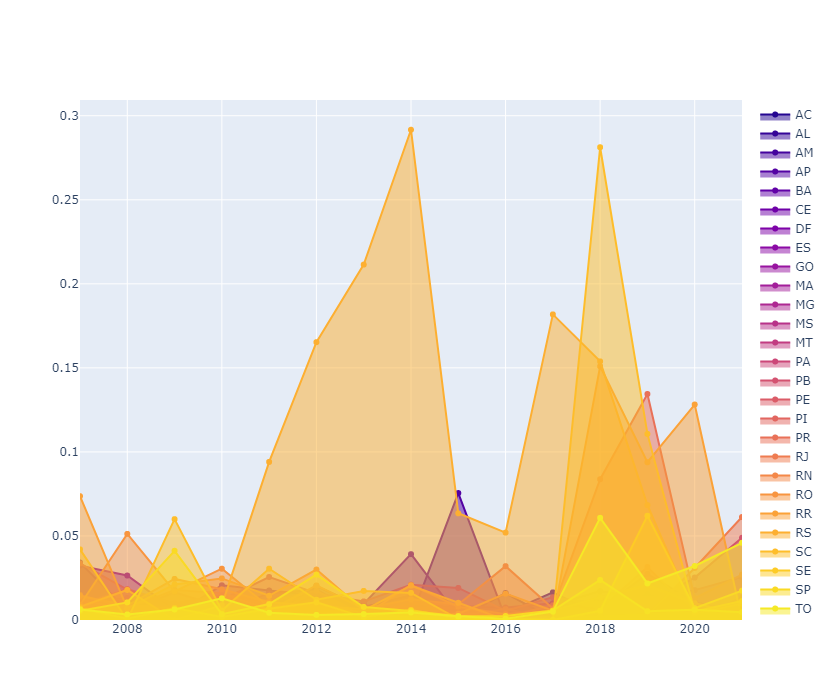

In [18]:
fig = go.Figure()
for d,p in zip(states, pal):
    fig.add_trace(go.Scatter(x = df_res[df_res['STATE']==d]['YEAR'],
                             y = df_res[df_res['STATE']==d]['RATIO'],
                             name = d,
                             line_color = p, 
                             fill='tozeroy'))   #tozeroy 
    fig.update_layout(width = 900, height = 700)

fig.show()

### Average and Standard Deviation of Ratio of tests and cases, maximum and minimum

In [19]:
df_res_ratio = df_res.copy()
df_res_ratio = df_res_ratio.drop(columns = ['TESTS','CASES'])
df_res_ratio = df_res_ratio.pivot(index='YEAR', columns='STATE').droplevel(0, axis=1)

In [20]:
df_stats_ratio = pd.DataFrame()
df_stats_ratio['MEAN'] = df_res_ratio.mean(axis = 0)
df_stats_ratio['STD'] = df_res_ratio.std(axis = 0)
df_stats_ratio['STD/MEAN'] = df_res_ratio.std(axis = 0)/df_res_ratio.mean(axis = 0)
df_stats_ratio['MAX'] = df_res_ratio.max(axis = 0)
df_stats_ratio['MIN'] = df_res_ratio.min(axis = 0)

In [21]:
df_stats_ratio.sort_values(['STD/MEAN'],ascending = [True])

MEAN       STD  STD/MEAN       MAX       MIN
STATE                                                  
PA     0.013784  0.008429  0.611478  0.033693  0.001789
GO     0.006714  0.004269  0.635887  0.016538  0.002169
PE     0.004445  0.002970  0.668102  0.012502  0.000238
MS     0.015944  0.011425  0.716548  0.048898  0.003086
MT     0.005518  0.004114  0.745458  0.013129  0.000637
MG     0.004534  0.003498  0.771538  0.012905  0.001135
CE     0.004072  0.003261  0.800762  0.012117  0.000257
DF     0.011684  0.009461  0.809738  0.032349  0.002210
MA     0.005027  0.004236  0.842570  0.013369  0.000515
BA     0.010962  0.009667  0.881901  0.039169  0.000844
AM     0.009320  0.008251  0.885293  0.034194  0.002126
PB     0.006062  0.005510  0.908821  0.018402  0.000000
RN     0.007526  0.006850  0.910116  0.024450  0.001045
PI     0.008760  0.008112  0.925945  0.031533  0.001203
RO     0.013567  0.012970  0.955974  0.051227  0.001339
RS     0.088661  0.091314  1.029924  0.291667  0.000000
SP     0.010686  0.011148  1.043181  0.041183  0.002275
AL     0.001698  0.001784  1.050576  0.007015  0.000000
ES     0.004656  0.005459  1.172258  0.018157  0.000767
RR     0.038690  0.049115  1.269426  0.150943  0.000000
TO     0.014177  0.018205  1.284075  0.060778  0.000790
PR     0.025500  0.036146  1.417501  0.134448  0.005439
RJ     0.011209  0.016046  1.431583  0.061271  0.000602
AC     0.002511  0.004272  1.701010  0.016026  0.000000
SE     0.009014  0.015371  1.705307  0.062010  0.000000
SC     0.039531  0.073244  1.852806  0.281250  0.000000
AP     0.009116  0.019264  2.113222  0.075532  0.000000